# Estadística Aplicada

Sesión 19 - 18 octubre

Paulina Quiroz Sánchez 1723927 gpo 41

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#librerias especializadas

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

## estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [28]:
plt.rcParams['figure.figsize']=(10,6)

In [29]:
##DATOS
igae_sa=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [30]:
igae_sa.head(1)

,meses,IGAE_DESES
0,1993/01,56.28229


In [31]:
#le damos formato a la fecha
igae_sa['meses']=pd.to_datetime(igae_sa['meses'],format='%Y/%m')

In [32]:
igae_sa

,meses,IGAE_DESES
0,1993-01-01,56.282290
1,1993-02-01,57.708594
2,1993-03-01,57.825254
3,1993-04-01,57.179522
4,1993-05-01,57.895451
...,...,...
362,2023-03-01,102.032776
363,2023-04-01,102.735045
364,2023-05-01,102.924688
365,2023-06-01,103.438087


In [33]:
##hacerlo index
igae_sa=igae_sa.set_index('meses')

In [34]:
#verificamos si tiene frecuencia
igae_sa.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq=None)

###
ARIMA (series sin efecto estacional)
SARIMA (series con compomente estacional)

In [35]:
##asignar frecuencia mensual
igae_sa = igae_sa.asfreq('MS')

Text(0, 0.5, 'índice')

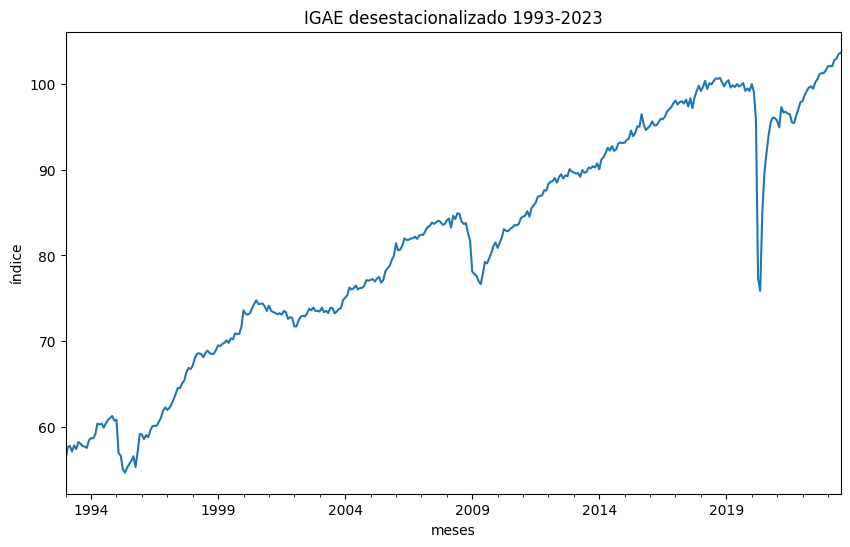

In [36]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('índice')

In [37]:
## prueba de Dickey-Fuller aumentada
## Ho: No estacionaria
## Ha: Estacionaria
df_test=adfuller(igae_sa['IGAE_DESES'])
pvalue=df_test[1]

In [38]:
pvalue

0.7352896929912623

In [39]:
##no rechazamos Ho significa que la serie es no estacionaria.


In [40]:
##hacer la serie estacionaria
igae_sa['igae_diff']=igae_sa['IGAE_DESES'].diff()

In [41]:
igae_sa.head()

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929


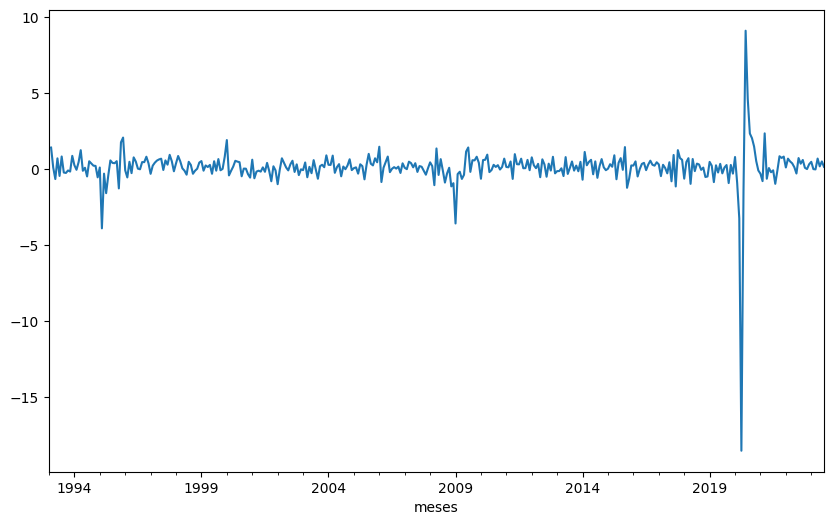

In [42]:
#graficar esta nueva serie
igae_sa['igae_diff'].plot();

In [43]:
##corroborar si las 1eras diferencias son estacionarias
df_test1=adfuller(igae_sa['igae_diff'].dropna())
pvalue1=df_test1[1]
pvalue1.round(3)

0.0

Rechazamos Ho, significa que las primeras diferencias del igae son estacionarias.
IGAE I(1)
Primeras diferencias I(0)

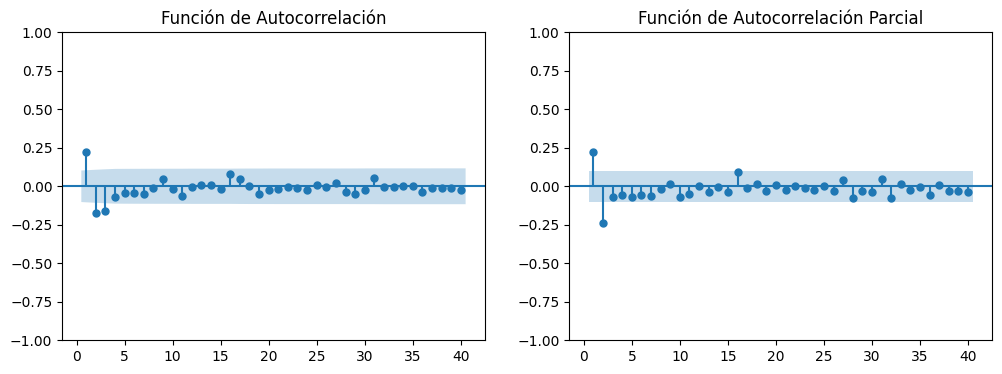

In [44]:
##Gráficas de autocorrelación y autocorrelación parcial
ig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show()

In [45]:
modelo_prueba=ARIMA(igae_sa['igae_diff'].dropna(), order=(1,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Wed, 18 Oct 2023   AIC                           1210.530
Time:                        20:33:34   BIC                           1222.238
Sample:                    02-01-1993   HQIC                          1215.182
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

Este es el modelo de prueba AR(1)
$$ Y_t=0.2219 Y_{t-1} + \varepsilon_t $$

In [ ]:
#vamos a estimar varios modelos y que se guarde el AIC BIC
ic ={}
for ar in range(7):
    for ma in range(7):
        print(f"AR:{ar}, MA:{ma}")
        modelo=ARIMA(igae_sa['igae_diff'].dropna(), order=(ar,0,ma))
        resultado = modelo.fit()
        ic[(ar,ma)]=[resultado.aic, resultado.bic]

ic=pd.DataFrame(ic,index=["AIC","BIC"]).T
ic.index=ic.index.set_names(["AR","MA"])

AR:0, MA:0
AR:0, MA:1
AR:0, MA:2
AR:0, MA:3
AR:0, MA:4
AR:0, MA:5
AR:0, MA:6
AR:1, MA:0
AR:1, MA:1
AR:1, MA:2
AR:1, MA:3
AR:1, MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:1, MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:1, MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2, MA:0
AR:2, MA:1
AR:2, MA:2
AR:2, MA:3
AR:2, MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2, MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2, MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA:0
AR:3, MA:1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA:2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA:3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA:0
AR:4, MA:1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:4, MA:2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA:3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:4, MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5, MA:0
AR:5, MA:1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5, MA:2


In [ ]:
ic.head()

In [ ]:
ic.sort_values('AIC').head()

primeras diferencias ARIMA(3,0,1)=ARMA(3,1)
igae_deses ARIMA (3,1,1)

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} - \theta
\varepsilon_{t-1} + \varepsilon_t$$

In [49]:
##Estimar el modelo
##igae ARIMA (3,1,1)
arima_model=ARIMA(igae_sa['IGAE_DESES'], order=(3,1,1))
results=arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             IGAE_DESES   No. Observations:                  367
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -591.604
Date:                Wed, 18 Oct 2023   AIC                           1193.208
Time:                        20:36:51   BIC                           1212.721
Sample:                    01-01-1993   HQIC                          1200.962
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0175      0.232      4.384      0.000       0.563       1.472
ar.L2         -0.4222      0.072     -5.876      0.000      -0.563      -0.281
ar.L3          0.1048      0.089      1.176      0.2

In [50]:
#pronosticar pasado
igae_sa['m_arima']=results.predict()


In [52]:
igae_sa['m_arima'][0]=igae_sa['IGAE_DESES'][0]

In [53]:
igae_sa.head()

,IGAE_DESES,igae_diff,m_arima
meses,,,
1993-01-01,56.282290,NaN,56.282290
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


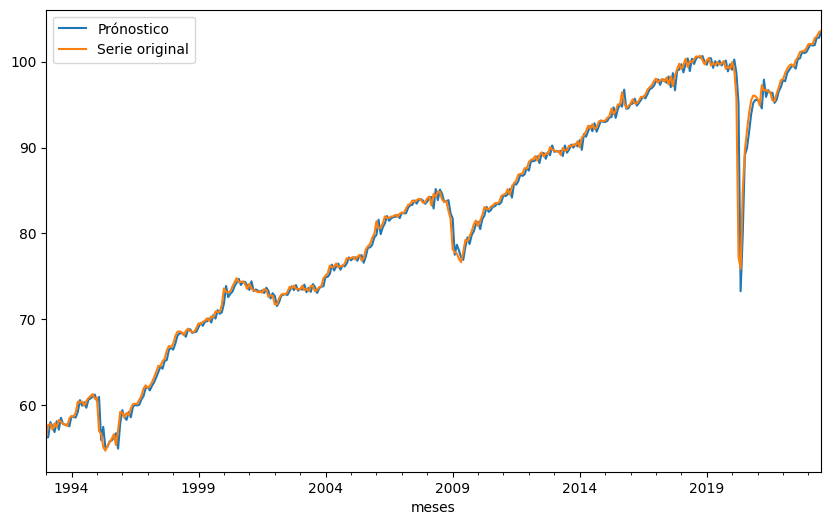

In [57]:
#graficar
igae_sa['m_arima'].plot(label='Prónostico')
igae_sa['IGAE_DESES'].plot(label='Serie original')
plt.legend();

El modelo arima estimado logra reproducir la evolución pasada de la serie, el modelo pueder ser util para pronosticar.

(612.0, 646.0)

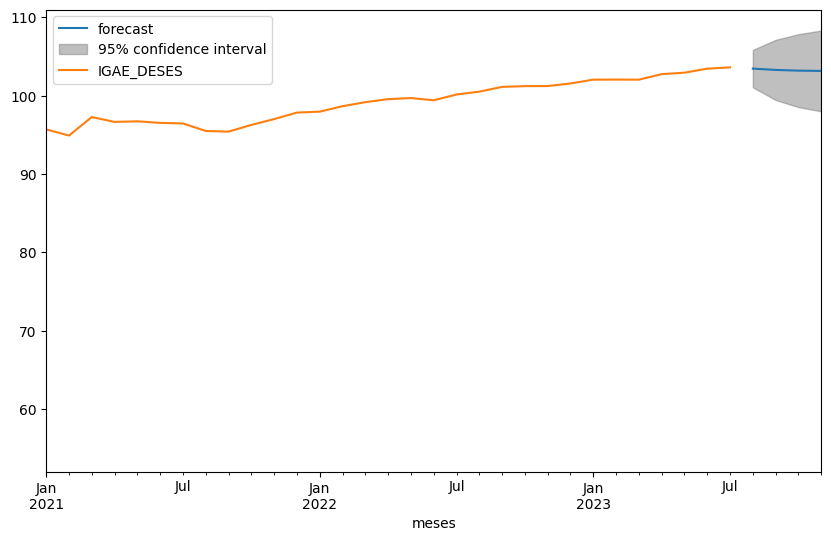

In [60]:
plot_predict(results,start='2023-08-01', end='2023-11-01')
igae_sa['IGAE_DESES'].plot()
plt.legend()
plt.xlim('2021-01-01','2023-11-01')

In [62]:
results.predict(start='2023-08-01', end='2025-11-01')

2023-08-01    103.443848
2023-09-01    103.275282
2023-10-01    103.184865
2023-11-01    103.148016
2023-12-01    103.131026
2024-01-01    103.119820
2024-02-01    103.111728
2024-03-01    103.106445
2024-04-01    103.103310
2024-05-01    103.101503
2024-06-01    103.100434
2024-07-01    103.099781
2024-08-01    103.099378
2024-09-01    103.099132
2024-10-01    103.098983
2024-11-01    103.098893
2024-12-01    103.098839
2025-01-01    103.098806
2025-02-01    103.098786
2025-03-01    103.098774
2025-04-01    103.098766
2025-05-01    103.098762
2025-06-01    103.098759
2025-07-01    103.098758
2025-08-01    103.098757
2025-09-01    103.098756
2025-10-01    103.098756
2025-11-01    103.098755
Freq: MS, Name: predicted_mean, dtype: float64

Los modelos ARIMA son modelos de prónostico a corto plazo, es decir no pueden pronosticar muy a futuro, y entre más a futuro pedimos un pronostico el intervalo de confianza se vuelve mas grande.
En general, se plantea lo siguiente:
Si es una ARIMA (3,1,1) se considera que el modelo pronostica con bastante precisión 3 periodos, si es una ARIMA(2,1,3) pronostica 3 periodos, ARIMA(2,1,4) 4 periodos.